# Generación de modelos de aprendizaje

In [ ]:
# librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importar el data set
dataset = pd.read_csv('dataI2.csv')
dataset.head(10)


,PSINDER,PDER_SEGP,P18A24A_M,PROM_HNV,POCUPADA_F,PEA_F,P15PRI_CO,P15SEC_COM,P15SEC_CO,ic_asalud
0,0.182509,0.127477,0.023029,0.000002,0.216443,0.220011,0.080355,0.091784,0.192352,20.0
1,0.147276,0.465636,0.012671,0.000051,0.137166,0.138583,0.098126,0.116676,0.252523,16.5
2,0.203124,0.555931,0.010609,0.000046,0.160378,0.161991,0.132086,0.098730,0.228567,21.0
3,0.138059,0.378765,0.015706,0.000148,0.141235,0.142941,0.083471,0.121235,0.254294,17.6
4,0.210107,0.154169,0.018433,0.000016,0.208937,0.210977,0.092781,0.089587,0.186071,21.1
5,0.185913,0.248520,0.017084,0.000050,0.182995,0.185094,0.083092,0.102065,0.221362,21.1
6,0.198626,0.353327,0.015897,0.000043,0.186216,0.188011,0.079207,0.096882,0.208370,22.4
7,0.130758,0.616206,0.010469,0.000278,0.150963,0.152324,0.103120,0.116834,0.253664,8.1
8,0.149344,0.497176,0.012052,0.000118,0.128352,0.129953,0.109184,0.104025,0.229753,17.0
9,0.210377,0.371985,0.011317,0.000126,0.131828,0.133074,0.110440,0.127032,0.259723,23.0


In [2]:
dataset.describe()

,PSINDER,PDER_SEGP,P18A24A_M,PROM_HNV,POCUPADA_F,PEA_F,P15PRI_CO,P15SEC_COM,P15SEC_CO,ic_asalud
count,2469.000000,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,0.241251,0.508301,0.012334,7.098557e-04,0.148426,0.149944,0.129095,0.087059,0.181706,25.106845
std,0.108190,0.216284,0.006112,1.743043e-03,0.052390,0.052713,0.038682,0.021673,0.043923,12.450740
min,0.010399,0.011161,0.000000,9.570757e-07,0.009719,0.009719,0.006567,0.007197,0.016127,1.100000
25%,0.162337,0.341537,0.007835,6.861547e-05,0.111218,0.112670,0.103120,0.071622,0.150389,16.100000
50%,0.226339,0.529593,0.011496,1.875666e-04,0.153759,0.154988,0.123563,0.085420,0.178947,23.200000
75%,0.306236,0.682927,0.016171,5.951256e-04,0.188285,0.189687,0.147063,0.101964,0.212752,32.800000
max,0.838574,0.968802,0.054466,3.901235e-02,0.305657,0.311687,0.413905,0.177874,0.329718,83.900000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PSINDER     2469 non-null   float64
 1   PDER_SEGP   2469 non-null   float64
 2   P18A24A_M   2469 non-null   float64
 3   PROM_HNV    2469 non-null   float64
 4   POCUPADA_F  2469 non-null   float64
 5   PEA_F       2469 non-null   float64
 6   P15PRI_CO   2469 non-null   float64
 7   P15SEC_COM  2469 non-null   float64
 8   P15SEC_CO   2469 non-null   float64
 9   ic_asalud   2469 non-null   float64
dtypes: float64(10)
memory usage: 193.0 KB


In [4]:
dataset.shape

(2469, 10)

## Modelos a utilizar:
<ul>
<li>Metodos de shirnkkage</li>
<ol>
<li>Regresión Ridge</li>
<li>Regresión Ridge</li>
<li>Elastic net</li>
</ol>
<li>Modelos basados en arboles</li>
<ol>
<li>DecisionTreeRegressor</li>
<li>GradientBoostingRegressor</li>
<li>Random Forest</li>
<li>ExtraTreesRegressor</li>
<li>XGBRegressor</li>
</ol>
<li>Support vector machine</li>
<ol>
<li>SVR</li>
</ol>
</ul>

## Entrenar modelos y mostrar resultados

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error


# # Variables de decisión y variable a predecir
# X = dataset.iloc[:, 0:-1].values
# y = dataset.iloc[:, -1].values.reshape(-1, 1)

# usar solo primeras 2 y ultima columna
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

# normalizar y
# y_scaler = MinMaxScaler()
# y = y_scaler.fit_transform(y)

# División en conjunto de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Definir modelos
scaler = MinMaxScaler()
modelos = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'LinearRegression': LinearRegression(),
    'GradientBoosting': GradientBoostingRegressor(),
    'RandomForest': RandomForestRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'XGB': XGBRegressor(),
    'SVR': SVR()  
}

# # Imprimir parametros de los modelos
# for nombre, modelo in modelos.items():
#     print(f"Modelo: {nombre}")
#     print(modelo.get_params())
#     print()

# Entrenar y evaluar modelos
resultados = []
resultados_entrenamiento = []
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train.ravel())  # ravel() para evitar warnings en algunos modelos
    y_pred = modelo.predict(X_test)
    resultados.append({
        'Modelo': nombre,
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': root_mean_squared_error(y_test, y_pred)

    })
    y_pred_entrenamiento = modelo.predict(X_train)
    resultados_entrenamiento.append({
        'Modelo': nombre,
        'MSE': mean_squared_error(y_train, y_pred_entrenamiento),
        'R2': r2_score(y_train, y_pred_entrenamiento),
        'MAE': mean_absolute_error(y_train, y_pred_entrenamiento),
        'RMSE': root_mean_squared_error(y_train, y_pred_entrenamiento)
    })
    print(f"{nombre}: R2={resultados[-1]['R2']:.4f}, MSE={resultados[-1]['MSE']:.4f}, MAE={resultados[-1]['MAE']:.4f}, RMSE={resultados[-1]['RMSE']:.4f}")

# Convertir resultados en DataFrame
resultados_df = pd.DataFrame(resultados).sort_values(by='R2', ascending=False)
resultados_df_entrenamiento = pd.DataFrame(resultados_entrenamiento).sort_values(by='R2', ascending=False)


Ridge: R2=0.8170, MSE=29.4268, MAE=3.6718, RMSE=5.4246
Lasso: R2=0.2699, MSE=117.4061, MAE=8.5038, RMSE=10.8354
ElasticNet: R2=0.0385, MSE=154.6191, MAE=9.7849, RMSE=12.4346
LinearRegression: R2=0.8190, MSE=29.1078, MAE=3.6537, RMSE=5.3952
GradientBoosting: R2=0.8136, MSE=29.9765, MAE=3.5549, RMSE=5.4751
RandomForest: R2=0.8010, MSE=32.0018, MAE=3.6208, RMSE=5.6570
ExtraTrees: R2=0.8028, MSE=31.7050, MAE=3.6928, RMSE=5.6307
XGB: R2=0.7861, MSE=34.3992, MAE=3.7892, RMSE=5.8651
SVR: R2=0.7774, MSE=35.7972, MAE=3.7802, RMSE=5.9831


## Evaluación de modelos de aprendizaje

## Resultados sobre datos de prueba

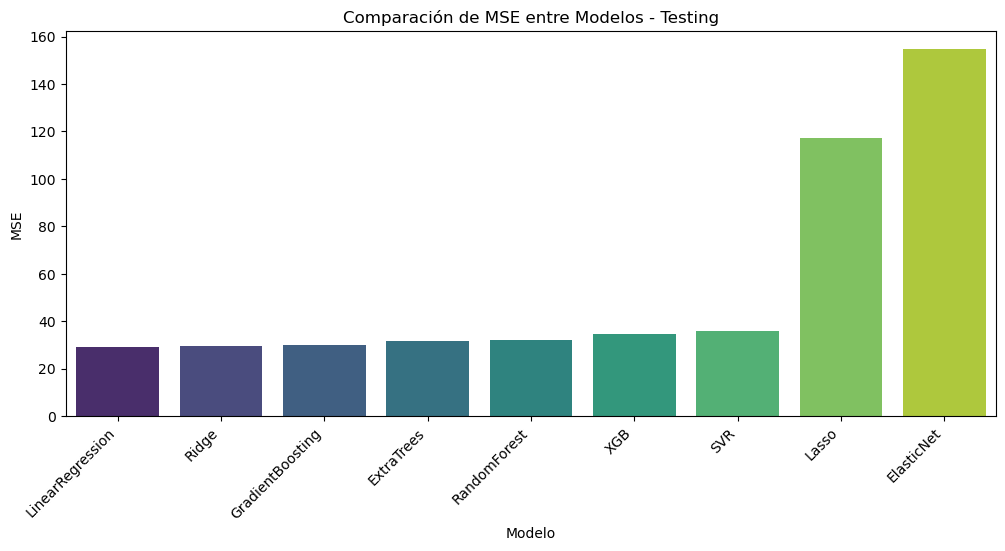

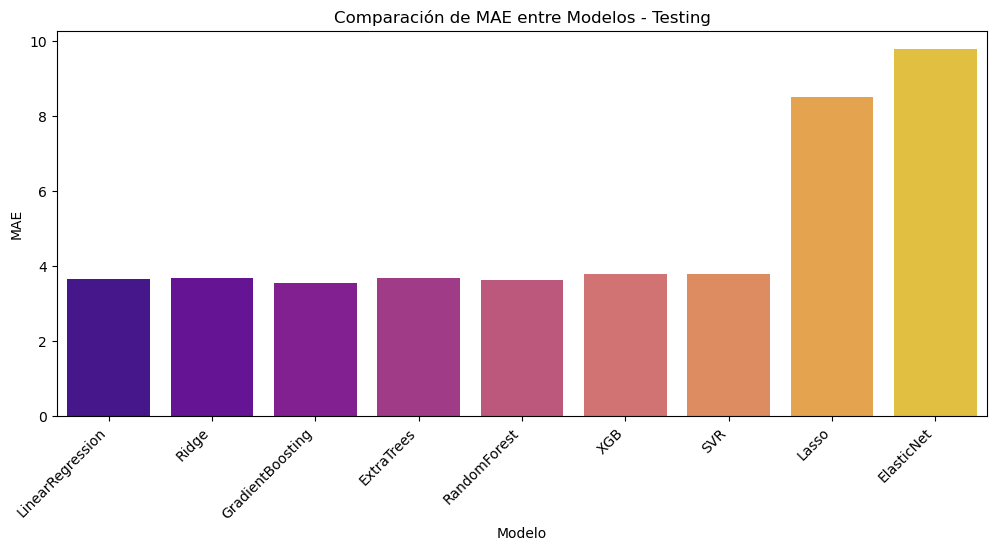

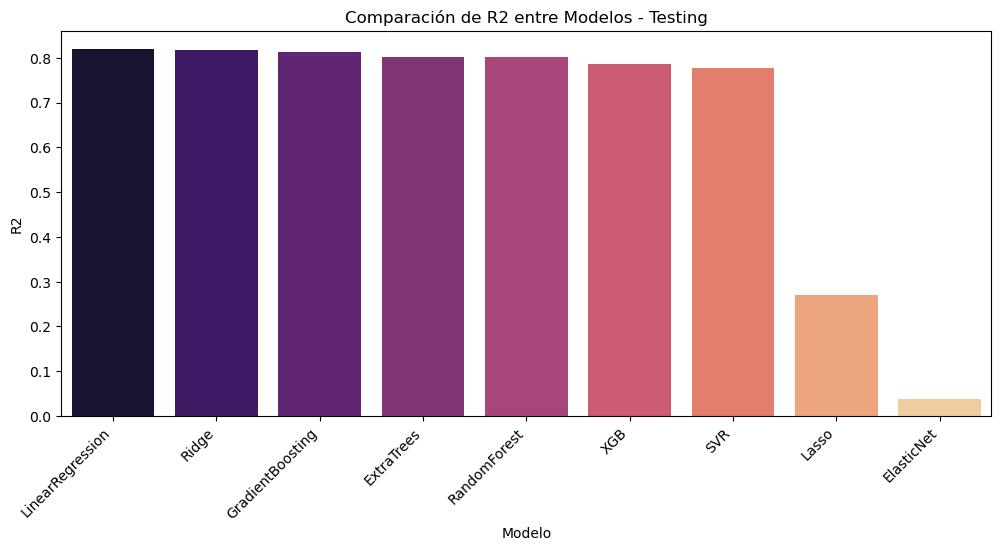

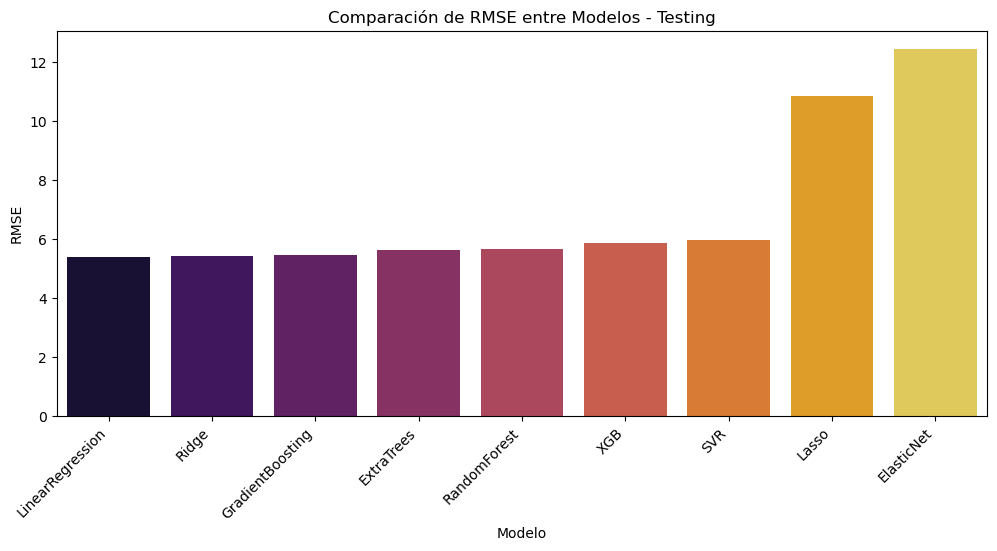

In [6]:
# Gráficos
plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MSE', data=resultados_df, palette='viridis', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MSE entre Modelos - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAE', data=resultados_df, palette='plasma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAE entre Modelos - Testing')
plt.show()


plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='R2', data=resultados_df, palette='magma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de R2 entre Modelos - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='RMSE', data=resultados_df, palette='inferno', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de RMSE entre Modelos - Testing')
plt.show()

### Análisis

Analizando todas la metricas podemos observar que Lineal, Ridge, GradientBoosting, y Random Forest, son los modelos que mejor desempeños muestran. El valor de r2 superior a 0.8 muestra un buen desempeño, ademas como fue observado en la descripción la desviación estandar de el indicador es de 12, por lo que las metricas de errores medios tambien presentan un buen valor.


## Resultados sobre datos de entrenamiento

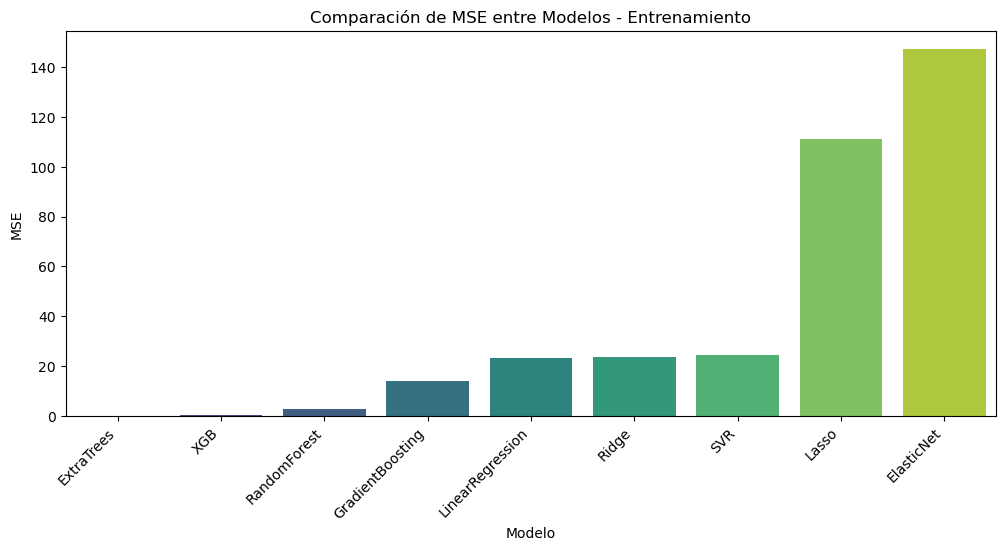

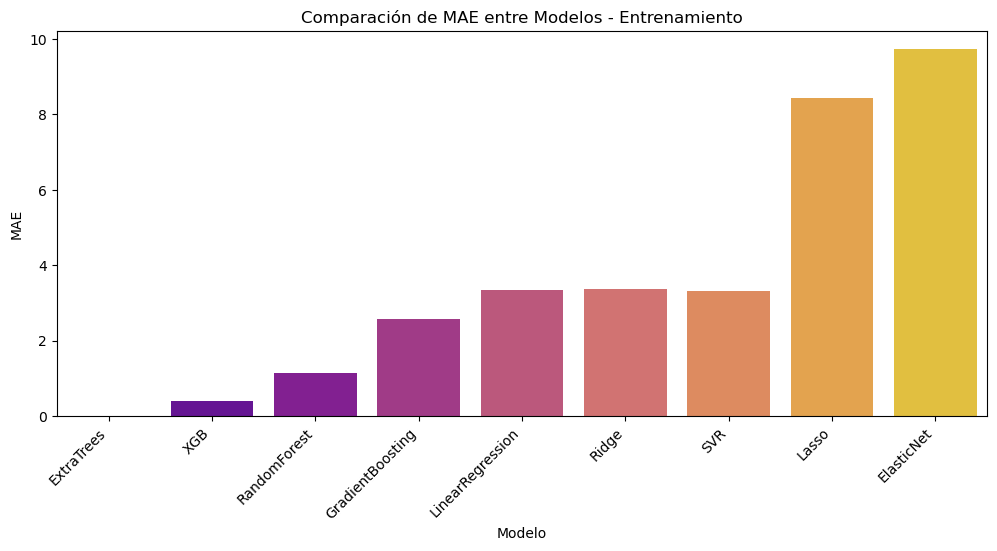

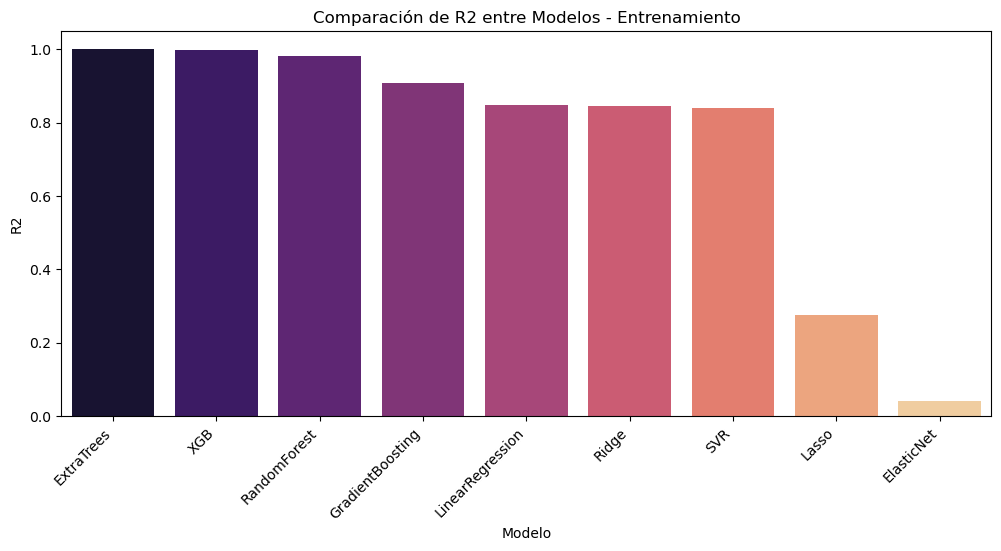

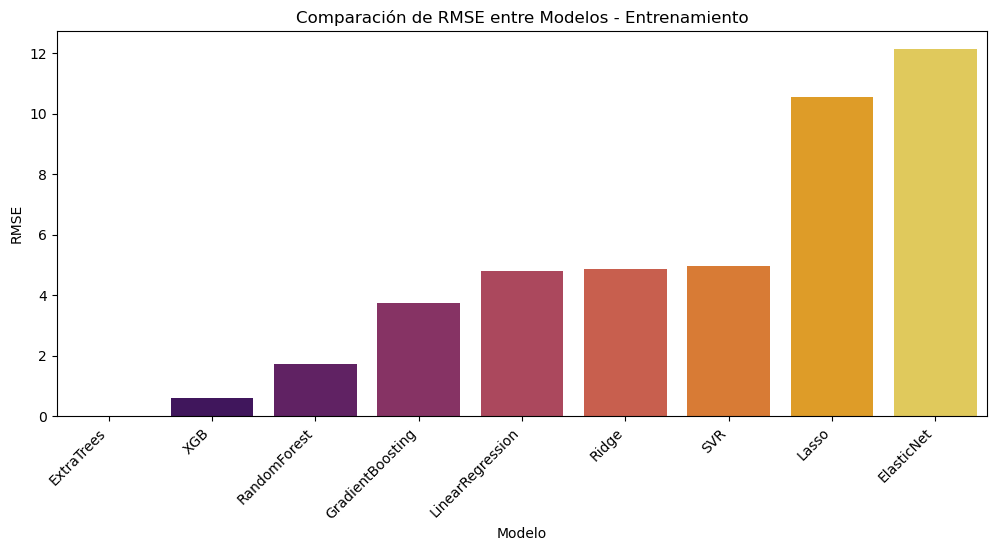

In [7]:
# Gráficos
plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MSE', data=resultados_df_entrenamiento, palette='viridis', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MSE entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAE', data=resultados_df_entrenamiento, palette='plasma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAE entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='R2', data=resultados_df_entrenamiento, palette='magma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de R2 entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='RMSE', data=resultados_df_entrenamiento, palette='inferno', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de RMSE entre Modelos - Entrenamiento')
plt.show()

### Analisis
El desempeño obtenido al evaluar sobre los datos de entrenamiento nos muestra que ExtraTrees y RandomForest pueden estar sobreajustando, en cambio GradientBoosting, Lineal y Ridge mantienen valos similares a los obtenidos con datos de prueba, esto podra ser confirmado mediante una validación cruzada y la grafica de aprendizaje.

## Validación cruzada

In [8]:
# Validación cruzada 
cv_r2_resultados = []
cv_mse_resultados = []
cv_mae_resultados = []
cv_rmse_resultados = []
for nombre, modelo in modelos.items():
    r2_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='r2')
    mse_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_mean_absolute_error')
    rmse_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_root_mean_squared_error')
    cv_r2_resultados.append({
        'Modelo': nombre,
        'R2 Medio': r2_scores.mean(),
        'R2 Std': r2_scores.std()
    })
    cv_mse_resultados.append({
        'Modelo': nombre,
        'MSE Medio': mse_scores.mean(),
        'MSE Std': mse_scores.std()
    })
    cv_mae_resultados.append({
        'Modelo': nombre,
        'MAE Medio': mae_scores.mean(),
        'MAE Std': mae_scores.std()
    })
    cv_rmse_resultados.append({
        'Modelo': nombre,
        'RMSE Medio': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    })
    print(f"{nombre}: R2 Medio={r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")

# Convertir resultados en DataFrame
cv_r2_resultados_df = pd.DataFrame(cv_r2_resultados).sort_values(by='R2 Medio', ascending=False)
cv_mse_resultados_df = pd.DataFrame(cv_mse_resultados).sort_values(by='MSE Medio', ascending=False)
cv_mae_resultados_df = pd.DataFrame(cv_mae_resultados).sort_values(by='MAE Medio', ascending=False)
cv_rmse_resultados_df = pd.DataFrame(cv_rmse_resultados).sort_values(by='RMSE Medio', ascending=False)


Ridge: R2 Medio=0.8446 (+/- 0.0116)
Lasso: R2 Medio=0.2732 (+/- 0.0226)
ElasticNet: R2 Medio=0.0378 (+/- 0.0041)
LinearRegression: R2 Medio=0.8477 (+/- 0.0127)
GradientBoosting: R2 Medio=0.8645 (+/- 0.0135)
RandomForest: R2 Medio=0.8635 (+/- 0.0162)
ExtraTrees: R2 Medio=0.8525 (+/- 0.0177)
XGB: R2 Medio=0.8466 (+/- 0.0113)
SVR: R2 Medio=0.8351 (+/- 0.0114)


### Resultados validación cruzada

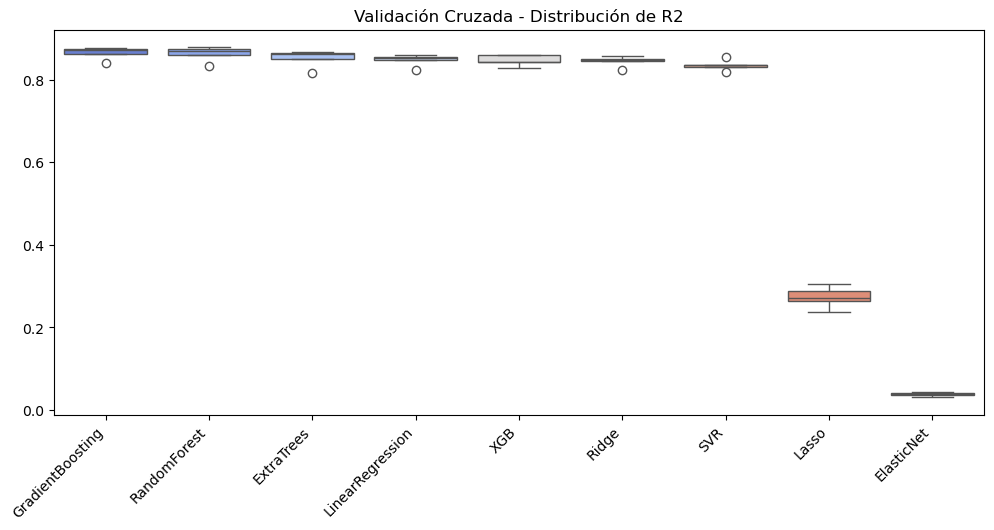

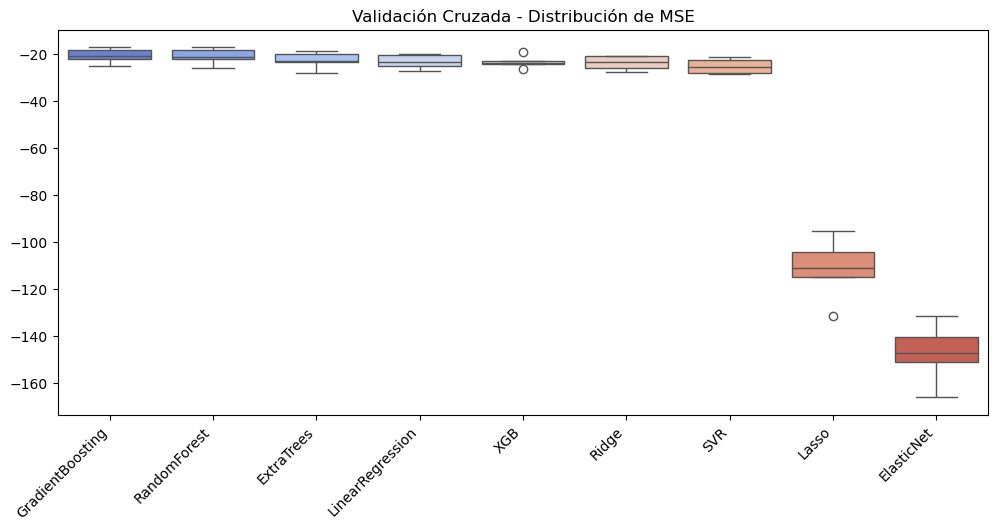

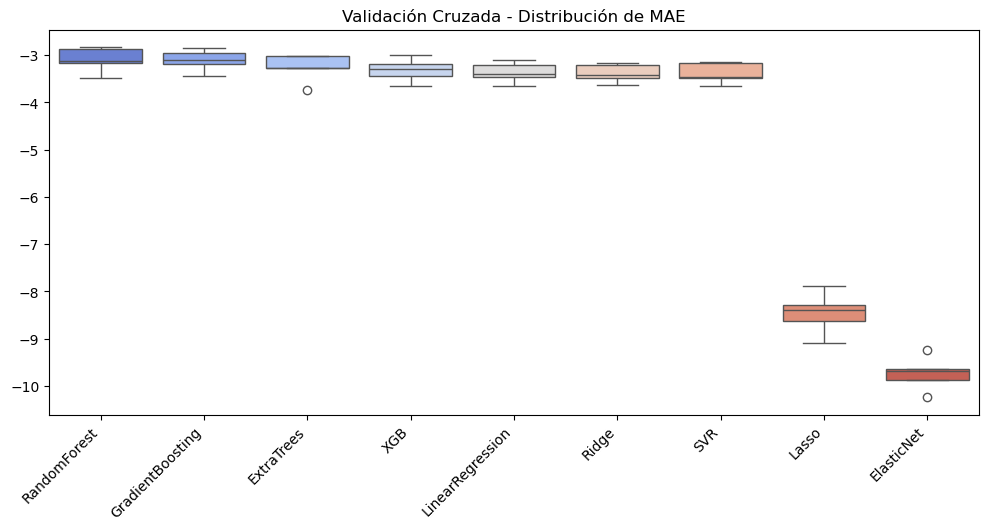

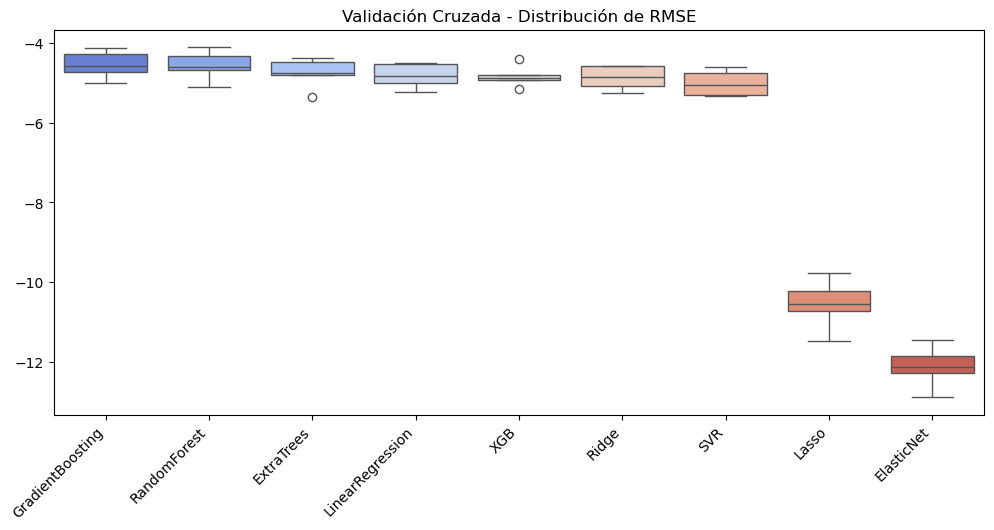

In [9]:
# Gráfico de validación cruzada de boxplot

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='r2') for n in cv_r2_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_r2_resultados_df['Modelo'])), cv_r2_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de R2')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error') for n in cv_mse_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_mse_resultados_df['Modelo'])), cv_mse_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de MSE')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_mean_absolute_error') for n in cv_mae_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_mae_resultados_df['Modelo'])), cv_mae_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de MAE')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_root_mean_squared_error') for n in cv_rmse_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_rmse_resultados_df['Modelo'])), cv_rmse_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de RMSE')
plt.show()

### Análisis
La validación cruzada revela nueva información sobre el desempeño de los modelos, primero XGBoost hace una aparición en 5to lugar desplazando a Ridge. Ademas, los modelos GradientBoosting, RandomForest, y ExtraTrees muestran los mejores resultados llegando a un valor medio de R2 de 0.86 sin perjudicar otras metricas.



## Curva de aprendizaje

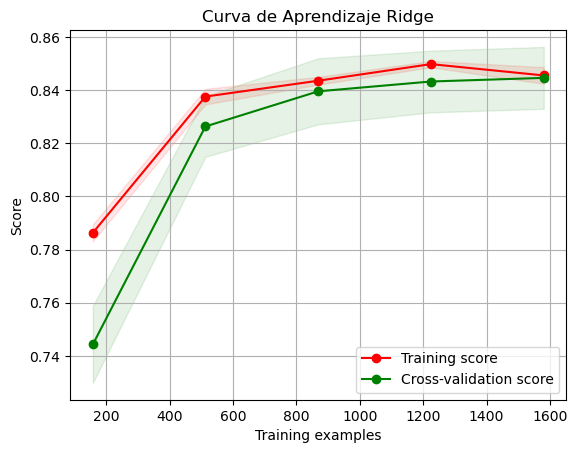

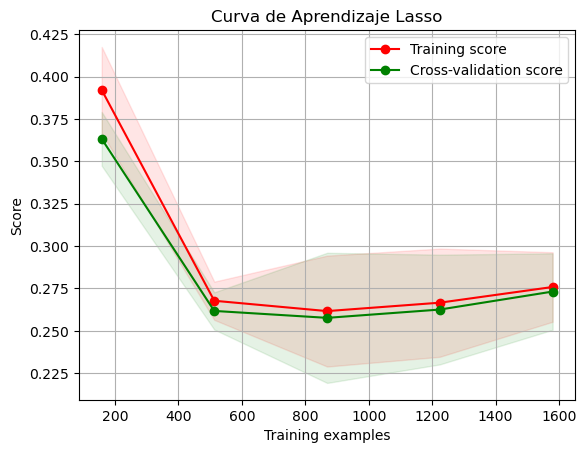

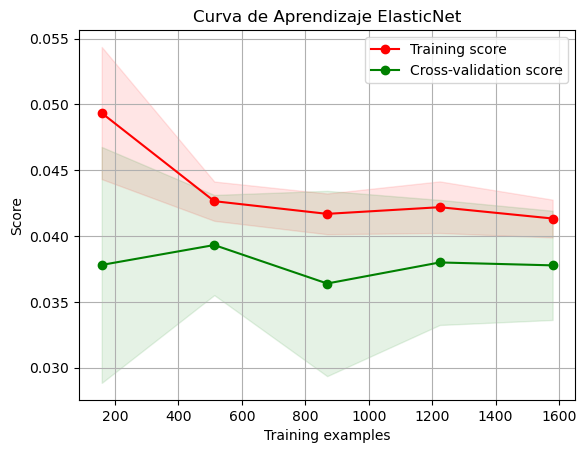

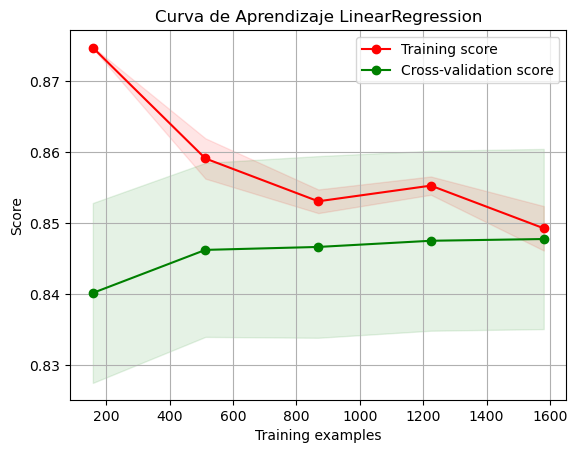

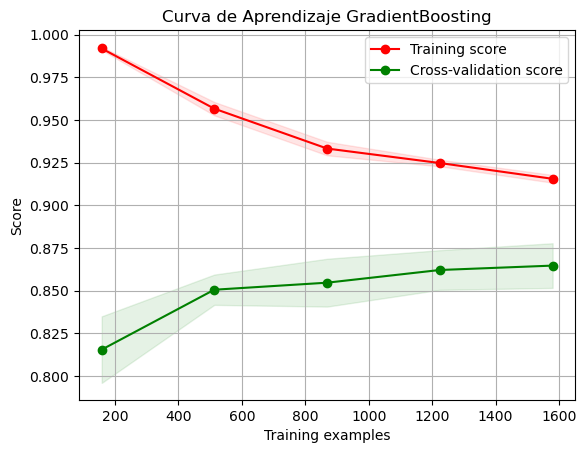

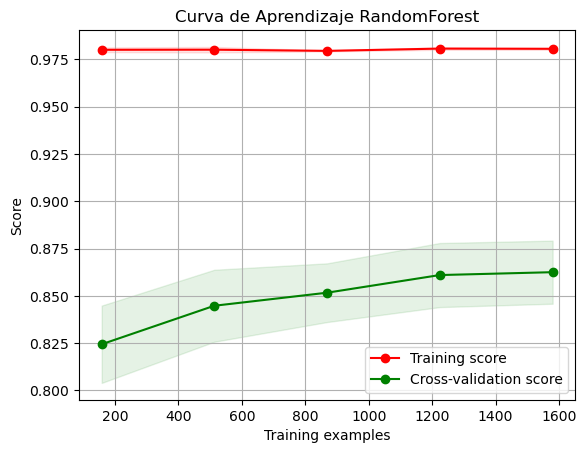

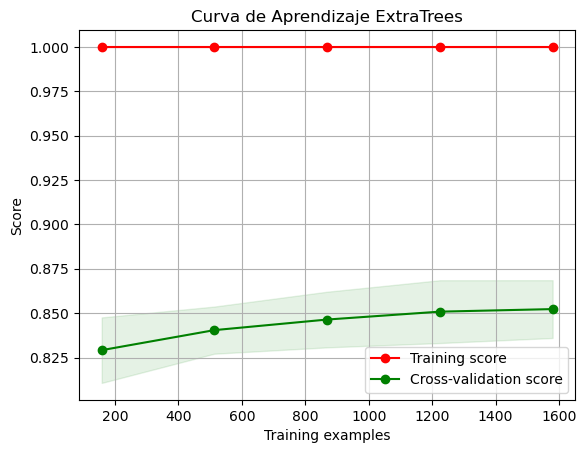

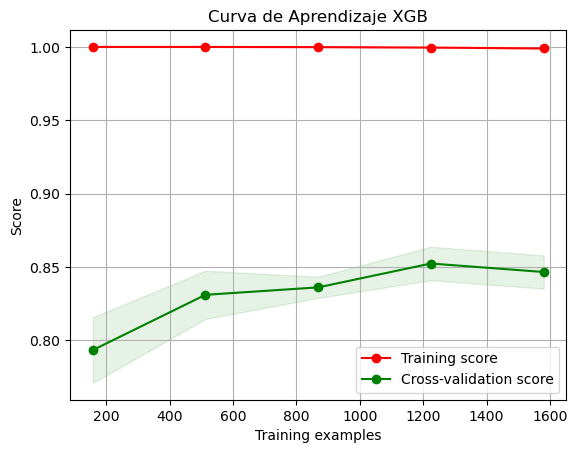

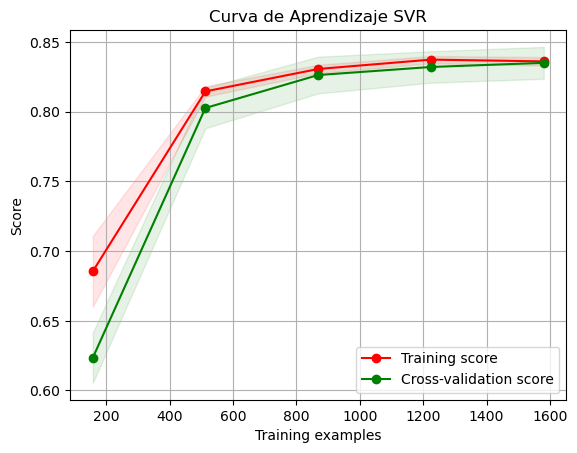

In [10]:
# Curva de aprendizaje
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for nombre, modelo in modelos.items():
    plot_learning_curve(modelo, f"Curva de Aprendizaje {nombre}", X_train, y_train.ravel(), cv=5, n_jobs=-1)
    plt.show()


## Ajuste de hiperparametros
Se seleccionaron los modelos Ridge regression y gradient boosting por su desempeños en las metricas presentadas

In [13]:
from sklearn.model_selection import GridSearchCV

ridge_params = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20],
    'max_iter': [1000, 5000, 10000, 20000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
    'random_state': [0]
}
ridge = Ridge()
ridge_search = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5, n_jobs=-1)
ridge_search.fit(X_train, y_train.ravel())


print("Mejor hiperparámetro para Ridge:", ridge_search.best_params_)
print("Mejor R²:", ridge_search.best_score_)



/Users/alvarobolanos/opt/anaconda3/envs/TC2004B/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvarobolanos/opt/anaconda3/envs/TC2004B/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvarobolanos/opt/anaconda3/envs/TC2004B/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvarobolanos/opt/anaconda3/envs/TC2004B/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvarobolanos/opt/anaconda3/envs/TC2004B/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reac

Mejor hiperparámetro para Ridge: {'alpha': 0.001, 'max_iter': 1000, 'random_state': 0, 'solver': 'auto', 'tol': 0.0001}
Mejor R²: 0.8477786540386759


In [17]:
# Desempeño del modelo con los mejores hiperparámetros
Ridge_best = Ridge(**ridge_search.best_params_)
Ridge_best.fit(X_train, y_train.ravel())
y_pred = Ridge_best.predict(X_test)

print('Resultados con el mejor modelo Ridge')
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")

Resultados con el mejor modelo Ridge
R2: 0.8188
MSE: 29.1426
MAE: 3.6487
RMSE: 5.3984
